In [2]:
!pip install pmdarima
!pip install skforecast

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 560.6/560.6 kB 5.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 380.1/380.1 kB 12.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 233.0/233.0 kB 10.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
import skforecast
from skforecast.datasets import fetch_dataset
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#df1 = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
#df2 = pd.read_csv("Sheriff_and_Police_Stations.csv")
df1 = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Sheriff_and_Police_Stations.csv')

In [ ]:
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

df1['YearMonth'] = df1['DATE OCC'].dt.to_period('M').astype(str)
df1 = df1.sort_values(by='DATE OCC')
# Crear el gr√°fico de dispersi√≥n con un control deslizante para cambiar las fechas
fig = px.scatter_mapbox(df1, lat="LAT", lon="LON", color="Crm Cd Desc", hover_name="Crm Cd Desc",
                        hover_data=["DATE OCC", "AREA NAME", "Vict Sex", "Vict Age"],
                        animation_frame="YearMonth", zoom=10, height=600)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0},
    clickmode='event+select'
)

police_stations = go.Scattermapbox(
    lat=df2['latitude'],
    lon=df2['longitude'],
    text=df2['name'],
    hoverinfo='text',
    mode='markers',
    marker=dict(size=10, color='blue', opacity=0.8),
    name='Estaciones de Polic√≠a'
)

# A√±adir el scattermapbox de las estaciones de polic√≠a a cada frame
for frame in fig.frames:
    frame.data += (go.Scattermapbox(
        lat=df2['latitude'],
        lon=df2['longitude'],
        text=df2['name'],
        hoverinfo='text',
        mode='markers',
        marker=dict(size=10, color='blue', opacity=0.8),
        name='Estaciones de Polic√≠a'
    ),)

# A√±adir el scattermapbox de las estaciones de polic√≠a a la figura principal
fig.add_trace(police_stations)

# Forzar la actualizaci√≥n de los frames para asegurar que contengan las estaciones de polic√≠a
fig.update(frames=fig.frames)

fig.show()

In [ ]:
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
df1['YearMonth'] = df1['DATE OCC'].dt.to_period('M').astype(str)
crimes_per_zone_time = df1.groupby(['AREA NAME', 'YearMonth']).size().reset_index(name='CrimeCount')
fig = px.bar(crimes_per_zone_time,
             x='AREA NAME',
             y='CrimeCount',
             color='AREA NAME',
             animation_frame='YearMonth',
             animation_group='AREA NAME',
             range_y=[0, crimes_per_zone_time['CrimeCount'].max()],
             title='Cr√≠menes por Zona a lo largo del tiempo')
fig.show()

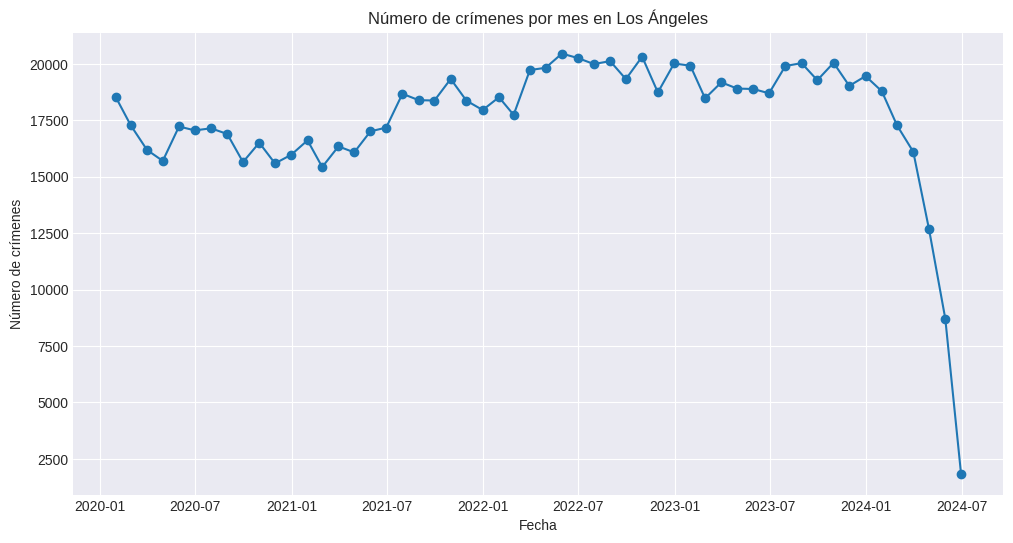

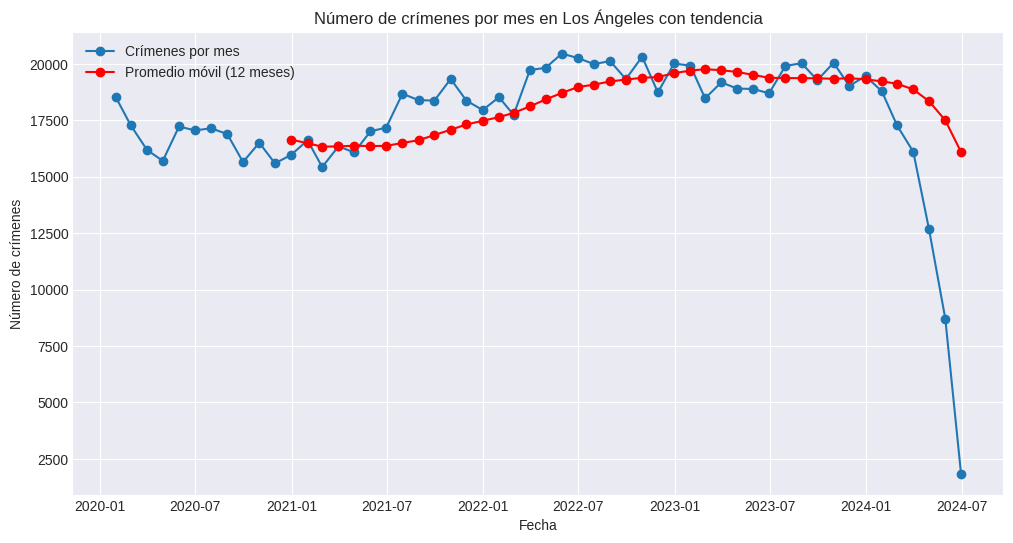

In [7]:
# Convertir la columna 'DATE OCC' a tipo datetime
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Establecer 'DATE OCC' como √≠ndice
df1.set_index('DATE OCC', inplace=True)

# Resamplear los datos por mes y contar el n√∫mero de cr√≠menes en cada mes
crimes_per_month = df1.resample('M').size()

# Crear el gr√°fico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_month, marker='o', linestyle='-')
plt.title('N√∫mero de cr√≠menes por mes en Los √Ångeles')
plt.xlabel('Fecha')
plt.ylabel('N√∫mero de cr√≠menes')
plt.grid(True)
plt.show()

# Mostrar patrones y tendencias utilizando un promedio m√≥vil
crimes_per_month_rolling = crimes_per_month.rolling(window=12).mean()

# Crear el gr√°fico de la serie de tiempo con la tendencia
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_month, marker='o', linestyle='-', label='Cr√≠menes por mes')
plt.plot(crimes_per_month_rolling, marker='o', linestyle='-', color='red', label='Promedio m√≥vil (12 meses)')
plt.title('N√∫mero de cr√≠menes por mes en Los √Ångeles con tendencia')
plt.xlabel('Fecha')
plt.ylabel('N√∫mero de cr√≠menes')
plt.legend()
plt.grid(True)
plt.show()

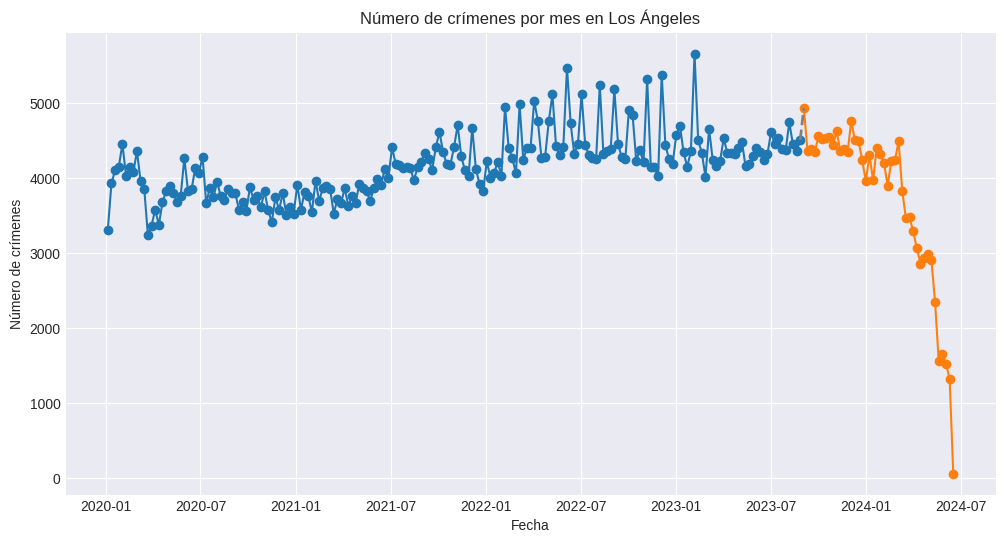

In [40]:
df1 = df1.sort_values(by='DATE OCC')
train_size = int(len(df1) * 0.8)

#train = df1[:train_size]
#test = df1[train_size:]
#crimes_per_day_train = train.resample('W').size()
#crimes_per_day_test = test.resample('W').size()

original_date = df1.iloc[train_size,1]
original_date = pd.to_datetime(original_date)
new_date = original_date - pd.offsets.Week(weekday=6)
mes_siguiente = new_date + pd.offsets.Week(weekday=0)

# Divide los datos en conjuntos de entrenamiento y prueba
train_graph = df1[:new_date]
test_graph  = df1[mes_siguiente:]

crimes_train = train_graph.resample('W').size()
crimes_test = test_graph.resample('W').size()

# Crear el gr√°fico de la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(crimes_train, marker='o', linestyle='-')
plt.plot(crimes_test, marker='o', linestyle='-')
plt.plot([crimes_train.index[-1], crimes_test.index[0]],
         [crimes_train.iloc[-1], crimes_test.iloc[0]],
         color='gray', linestyle='--', linewidth=2)
plt.title('N√∫mero de cr√≠menes por mes en Los √Ångeles')
plt.xlabel('Fecha')
plt.ylabel('N√∫mero de cr√≠menes')
plt.grid(True)
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

Test estacionariedad serie original
-------------------------------------
ADF Statistic: -1.2452453904414111, p-value: 0.6538359465860242
KPSS Statistic: 1.6813123409184858, p-value: 0.01

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -5.4292571228109034, p-value: 2.939477964026401e-06
KPSS Statistic: 0.08051984162635789, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -6.066101031129339, p-value: 1.180797127932735e-07
KPSS Statistic: 0.0488832769005981, p-value: 0.1

Test estacionariedad para serie diferenciada (order=3)
--------------------------------------------------
ADF Statistic: -9.800582996289236, p-value: 6.010156524910277e-17
KPSS Statistic: 0.05126150637507863, p-value: 0.1


<Axes: title={'center': 'Diferenciaci√≥n orden 3'}, xlabel='DATE OCC'>

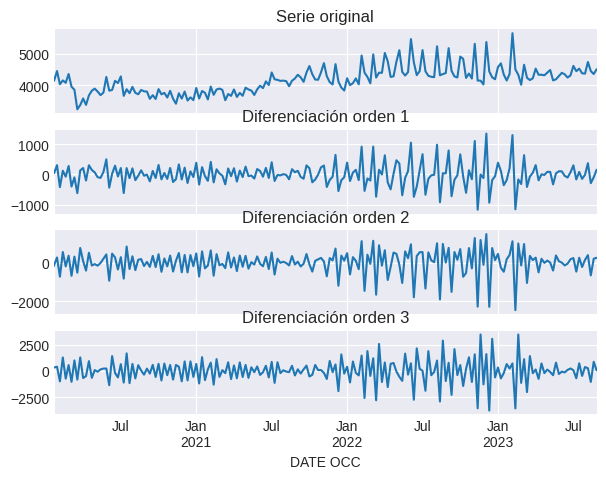

In [43]:
warnings.filterwarnings("ignore")
diff_1 = crimes_train.diff().dropna()
diff_2 = diff_1.diff().dropna()
diff_3 = diff_2.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(crimes_train)
kpss_result = kpss(crimes_train)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(diff_1)
kpss_result = kpss(diff_1.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(diff_2)
kpss_result = kpss(diff_2.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=3)')
print('--------------------------------------------------')
adfuller_result = adfuller(diff_3)
kpss_result = kpss(diff_3.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")


fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(7, 5), sharex=True)
crimes_train.plot(ax=axs[0], title='Serie original')
diff_1.plot(ax=axs[1], title='Diferenciaci√≥n orden 1')
diff_2.plot(ax=axs[2], title='Diferenciaci√≥n orden 2')
diff_3.plot(ax=axs[3], title='Diferenciaci√≥n orden 3')

El p-value obtenido tras la primera diferenciaci√≥n es estad√≠sticamente significativo acorde al umbral ampliamente reconocido y aceptado de 0.05. Por lo tanto, la selecci√≥n m√°s adecuada para el par√°metro ARIMA ùëë es 3.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'PACF')

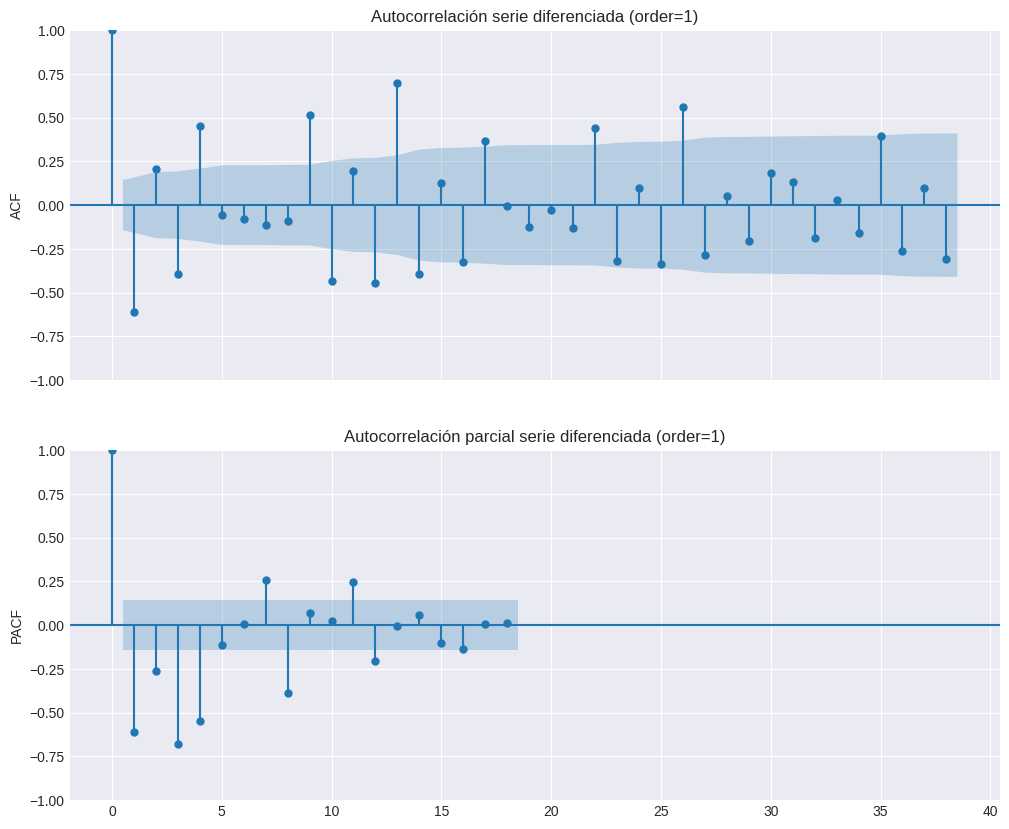

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)


plot_acf(diff_2, ax=axs[0], lags=38, alpha=0.05)
axs[0].set_title('Autocorrelaci√≥n serie diferenciada (order=2)')
axs[0].set_ylabel('ACF')


plot_pacf(diff_2, ax=axs[1], lags=18, alpha=0.05)
axs[1].set_title('Autocorrelaci√≥n parcial serie diferenciada (order=2)')
axs[1].set_ylabel('PACF')

Acorde a la funci√≥n de autocorrelaci√≥n, el valor √≥ptimo para el par√°metro ùëù es 1. Sin embargo, se va a asignar un valor de 1 para proporcionar un componente autorregresivo al modelo. En cuanto al componente ùëû , la funci√≥n de autocorrelaci√≥n parcial sugiere un valor de 6.

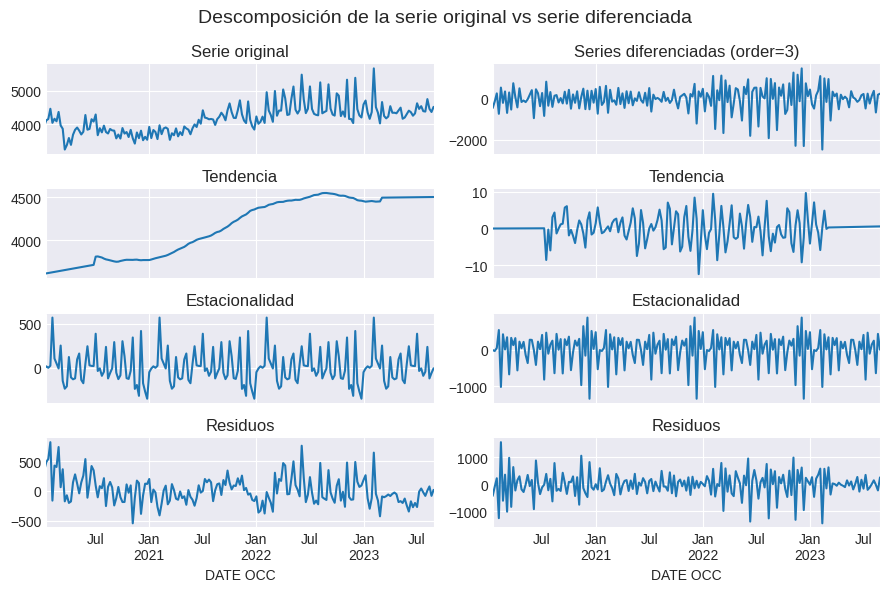

In [46]:
res_decompose = seasonal_decompose(crimes_train, model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(diff_2, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9, 6), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos')
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order=3)')
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia')
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad')
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos')
fig.suptitle('Descomposici√≥n de la serie original vs serie diferenciada', fontsize=14)
fig.tight_layout()

El patr√≥n recurrente cada 2 meses sugiere una estacionalidad anual, probablemente influenciada por factores vacacionales. El gr√°fico de ACF respalda a√∫n m√°s la presencia de esta estacionalidad, ya que se observan picos significativos en los lags correspondientes a los intervalos de 2 meses, confirmando la idea de patrones recurrentes.

In [57]:
modelo = auto_arima(
            y                 = crimes_train,
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            seasonal          = True,
            test              = 'adf',
            m                 = 4, # periodicidad de la estacionalidad
            d                 = None, # El algoritmo determina 'd'
            D                 = None, # El algoritmo determina 'D'
            trace             = True,
            error_action      = 'ignore',
            suppress_warnings = True,
            stepwise          = True
        )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=2761.797, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=2856.783, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=2720.594, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=2730.975, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=3729.920, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=2776.310, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=2698.845, Time=1.10 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=2716.983, Time=0.59 sec
 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(1,0,0)(1,0,2)[4] intercept   : AIC=2693.052, Time=1.40 sec
 ARIMA(1,0,0)(0,0,2)[4] intercept   : AIC=2697.393, Time=0.82 sec
 ARIMA(1,0,0)(2,0,2)[4] intercept   : AIC=2712.477, Time=2.54 sec
 ARIMA(0,0,0)(1,0,2)[4] intercept   : AIC=2721.259, Time=0.54 sec
 ARIMA(2,0,0)(1,0,2)[4] intercept   : AIC=26

In [61]:
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = SARIMAX(endog = crimes_train, order = (1, 0, 2), seasonal_order = (0, 0, 2, 4))
modelo_res = modelo.fit(disp=0)
warnings.filterwarnings("default")
predicciones_statsmodels = modelo_res.get_forecast(steps=len(crimes_test)).predicted_mean

In [62]:
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = Sarimax(order = (1, 0, 2), seasonal_order = (0, 0, 2, 4))
modelo.fit(y=crimes_train)
warnings.filterwarnings("default")
predicciones_skforecast = modelo.predict(steps=len(crimes_test))

In [63]:
modelo = ARIMA(order = (1, 0, 2), seasonal_order = (0, 0, 2, 4))
modelo.fit(y=crimes_train)
predicciones_pdmarima = modelo.predict(len(crimes_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


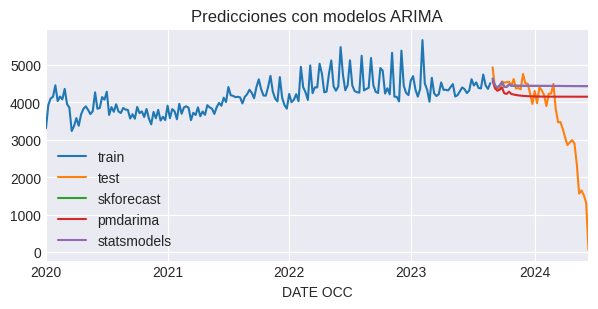

In [64]:
fig, ax = plt.subplots(figsize=(7, 3))
crimes_train.plot(ax=ax, label='train')
crimes_test.plot(ax=ax, label='test')
predicciones_skforecast.columns = ['skforecast']
predicciones_skforecast.plot(ax=ax, label='skforecast')
predicciones_pdmarima.plot(ax=ax, label='pmdarima')
predicciones_statsmodels.plot(ax=ax, label='statsmodels')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend();

Statsmodel y Skforecast son iguales

In [65]:
forecaster = ForecasterSarimax(
                 regressor=Sarimax(order = (1, 0, 2), seasonal_order = (0, 0, 2, 4))
             )
forecaster.fit(y=crimes_train, suppress_warnings=True)

# Predicci√≥n
predicciones = forecaster.predict(steps=len(crimes_test))

In [66]:
forecaster = ForecasterSarimax(
                 regressor=Sarimax(
                                order = (1, 0, 2),
                                seasonal_order = (0, 0, 2, 4),
                                maxiter=200
                            )
             )
metrica, predicciones = backtesting_sarimax(
                            forecaster            = forecaster,
                            y                     = pd.concat([crimes_train, crimes_test]),
                            initial_train_size    = len(crimes_train),
                            fixed_train_size      = False,
                            steps                 = 4,
                            metric                = 'mean_absolute_error',
                            refit                 = True,
                            n_jobs                = "auto",
                            suppress_warnings_fit = True,
                            verbose               = True,
                            show_progress         = True
                        )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 191
Number of observations used for backtesting: 42
    Number of folds: 11
    Number of steps per fold: 4
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 2 observations.

Fold: 0
    Training:   2020-01-05 00:00:00 -- 2023-08-27 00:00:00  (n=191)
    Validation: 2023-09-03 00:00:00 -- 2023-09-24 00:00:00  (n=4)
Fold: 1
    Training:   2020-01-05 00:00:00 -- 2023-09-24 00:00:00  (n=195)
    Validation: 2023-10-01 00:00:00 -- 2023-10-22 00:00:00  (n=4)
Fold: 2
    Training:   2020-01-05 00:00:00 -- 2023-10-22 00:00:00  (n=199)
    Validation: 2023-10-29 00:00:00 -- 2023-11-19 00:00:00  (n=4)
Fold: 3
    Training:   2020-01-05 00:00:00 -- 2023-11-19 00:00:00  (n=203)
    Validation: 2023-11-26 00:00:00 -- 2023-12-17 00:00:00  (n=4)
Fold: 4
    Training:   2020-01-05 00:00:00 -- 2023-12-17 00:00:00  (n=207)


  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


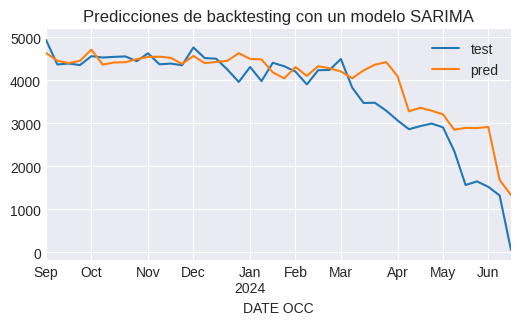

In [67]:
fig, ax = plt.subplots(figsize=(6, 3))
crimes_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax)
ax.set_title('Predicciones de backtesting con un modelo SARIMA')
ax.legend();